In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/content/titanic_train_synthetic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Johnson, Dr. Elizabeth",female,21.3,3,1,376641,11.31,NaN,S
1,2,1,2,"Brown, Master. William",male,31.7,1,2,734056,23.34,NaN,C
2,3,0,3,"Rodriguez, Dr. Anna",female,16.2,0,1,83289,11.69,NaN,S
3,4,0,3,"Martin, Mrs. Minnie",female,12.2,3,1,807529,9.34,NaN,S
4,5,1,1,"Jackson, Mr. Frank",male,24.8,4,2,326247,243.02,G13,S


In [2]:
# Quick info and summary
display(df.info())
display(df.describe(include='all'))

# Basic sanity checks
display(df.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Survived     800 non-null    int64  
 2   Pclass       800 non-null    int64  
 3   Name         800 non-null    object 
 4   Sex          800 non-null    object 
 5   Age          633 non-null    float64
 6   SibSp        800 non-null    int64  
 7   Parch        800 non-null    int64  
 8   Ticket       800 non-null    int64  
 9   Fare         800 non-null    float64
 10  Cabin        222 non-null    object 
 11  Embarked     800 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 75.1+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,800.0000,800.000000,800.000000,800,800,633.000000,800.000000,800.000000,800.000000,800.000000,222,800
unique,NaN,NaN,NaN,574,2,NaN,NaN,NaN,NaN,NaN,203,3
top,NaN,NaN,NaN,"Johnson, Master. Joseph",male,NaN,NaN,NaN,NaN,NaN,E198,S
freq,NaN,NaN,NaN,5,494,NaN,NaN,NaN,NaN,NaN,2,590
mean,400.5000,0.485000,2.306250,NaN,NaN,28.752449,1.953750,1.446250,500794.350000,33.768487,NaN,NaN
std,231.0844,0.500088,0.834165,NaN,NaN,13.205687,1.417435,1.110699,278760.080739,47.705920,NaN,NaN
min,1.0000,0.000000,1.000000,NaN,NaN,0.400000,0.000000,0.000000,13175.000000,3.000000,NaN,NaN
25%,200.7500,0.000000,2.000000,NaN,NaN,19.900000,1.000000,0.000000,254059.500000,9.932500,NaN,NaN
50%,400.5000,0.000000,3.000000,NaN,NaN,28.900000,2.000000,1.000000,505661.500000,14.430000,NaN,NaN
75%,600.2500,1.000000,3.000000,NaN,NaN,37.700000,3.000000,2.000000,731219.000000,33.245000,NaN,NaN


,0
Cabin,578
Age,167
PassengerId,0
Survived,0
Name,0
Pclass,0
SibSp,0
Sex,0
Parch,0
Ticket,0


# Missing Values

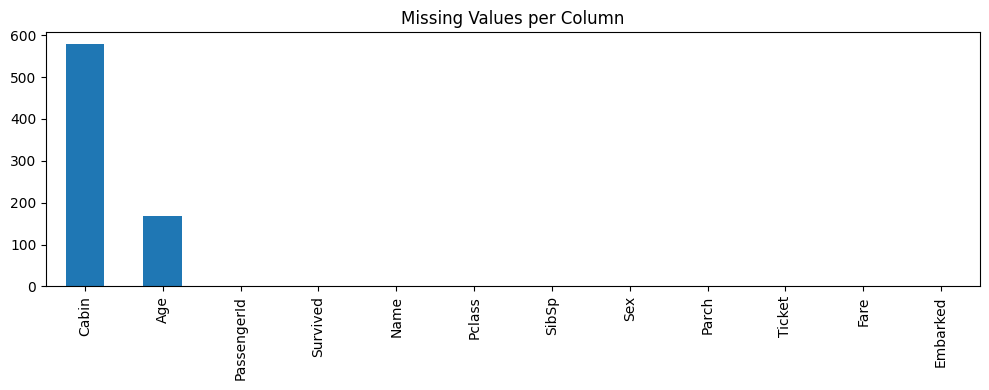

In [3]:
# Visualize missingness (simple bar)
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts.plot(kind='bar', figsize=(10,4), title='Missing Values per Column')
plt.tight_layout()
plt.show()

# Simple imputation for Age to proceed with plots (median)
df['Age_imputed'] = df['Age'].fillna(df['Age'].median())

## Univariate Analysis

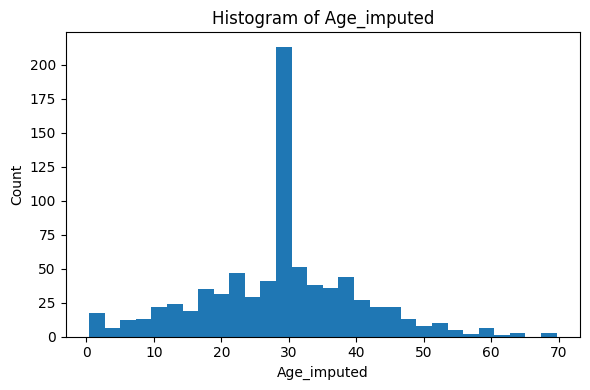

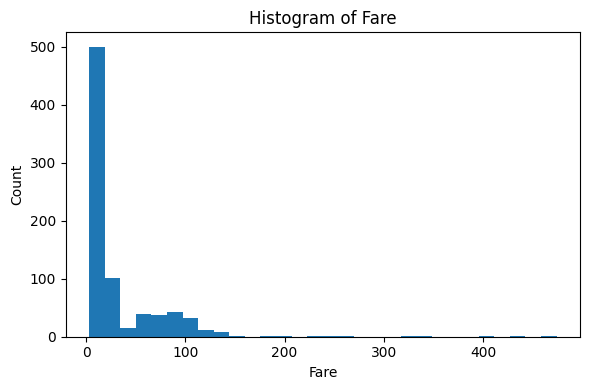

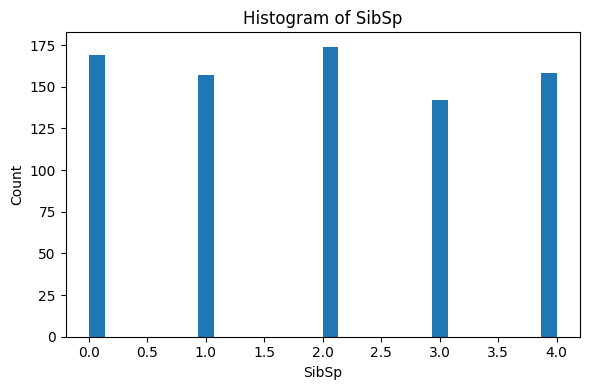

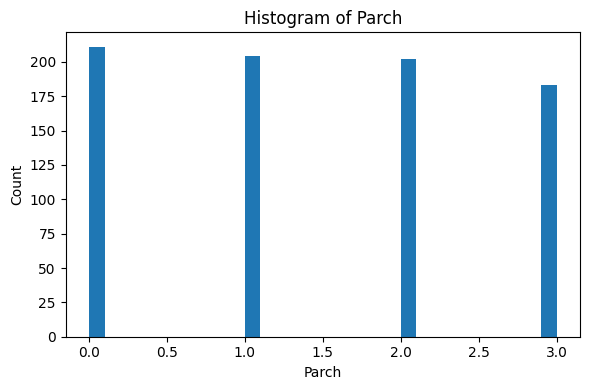

In [4]:
# Histograms for numeric columns
num_cols = ['Age_imputed','Fare','SibSp','Parch']
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

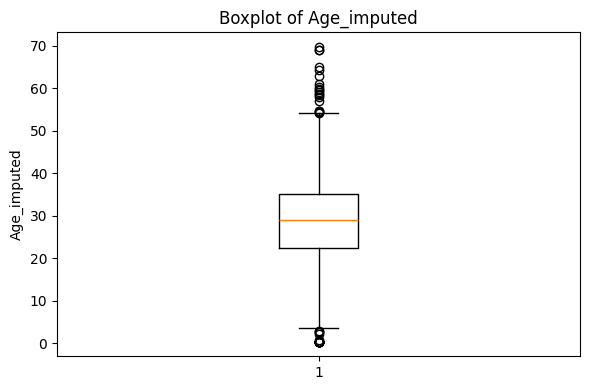

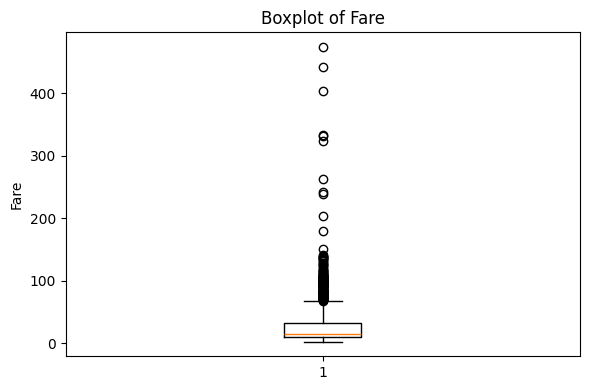

In [5]:
# Boxplots to check outliers
for col in ['Age_imputed','Fare']:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

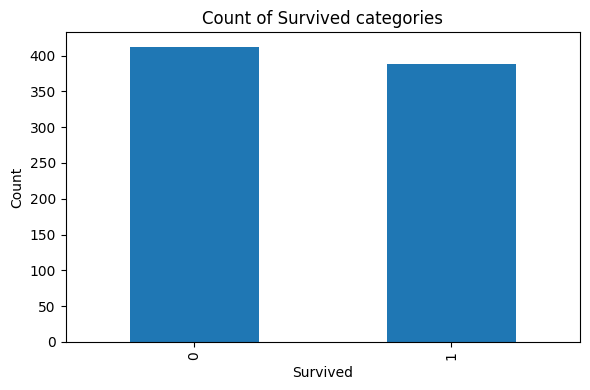

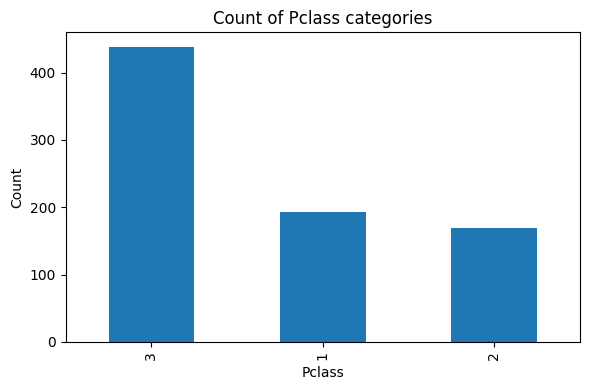

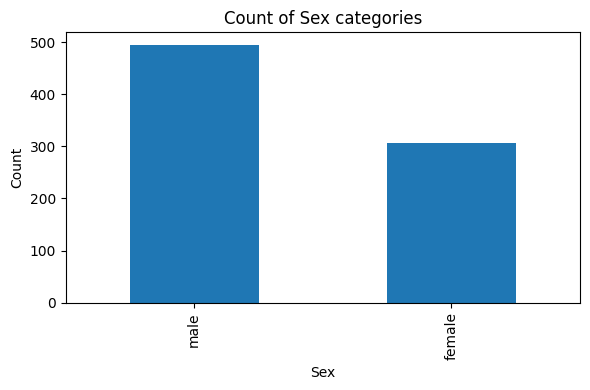

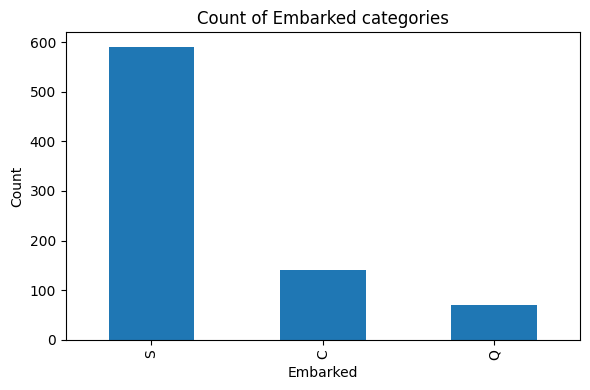

In [6]:
# Categorical counts
cat_cols = ['Survived','Pclass','Sex','Embarked']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col} categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

Survived,0,1
Sex,,
female,37.58,62.42
male,60.12,39.88


Survived,0,1
Pclass,,
1,25.39,74.61
2,46.15,53.85
3,65.07,34.93


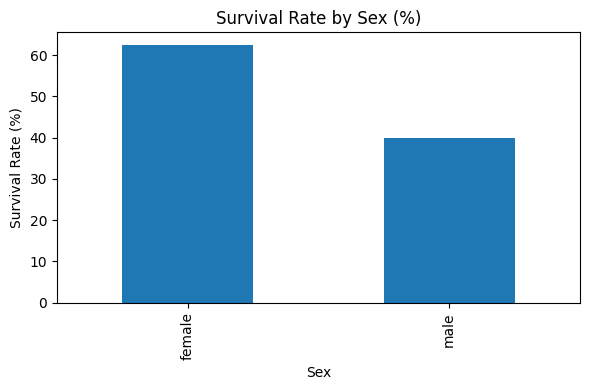

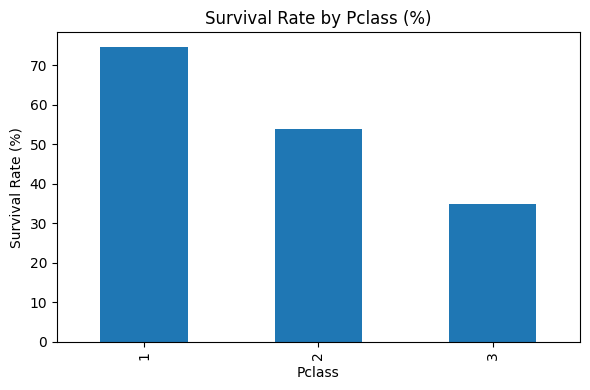

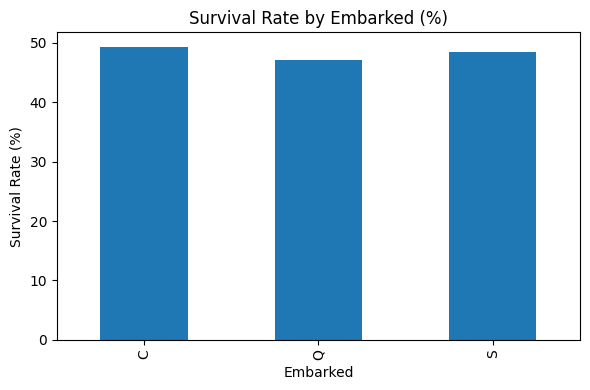

In [7]:
# Survival rate by Sex and Pclass
ct1 = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
ct2 = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
display(ct1.round(2))
display(ct2.round(2))

# Bar charts for survival by groups
for col in ['Sex', 'Pclass', 'Embarked']:
    rate = df.groupby(col)['Survived'].mean() * 100
    plt.figure(figsize=(6,4))
    rate.plot(kind='bar')
    plt.title(f'Survival Rate by {col} (%)')
    plt.ylabel('Survival Rate (%)')
    plt.tight_layout()
    plt.show()

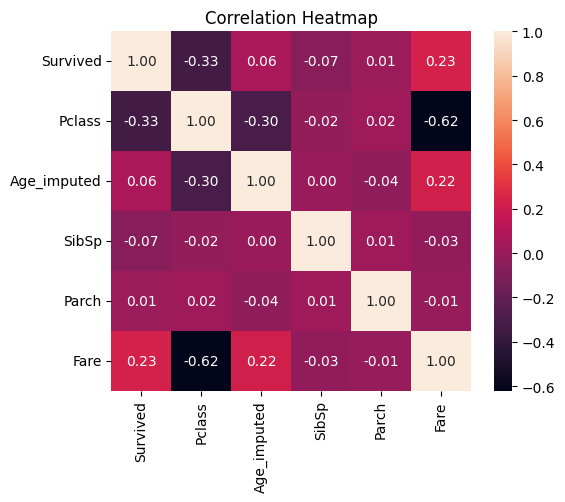

In [8]:
# Correlation heatmap (numeric)
corr = df[['Survived','Pclass','Age_imputed','SibSp','Parch','Fare']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

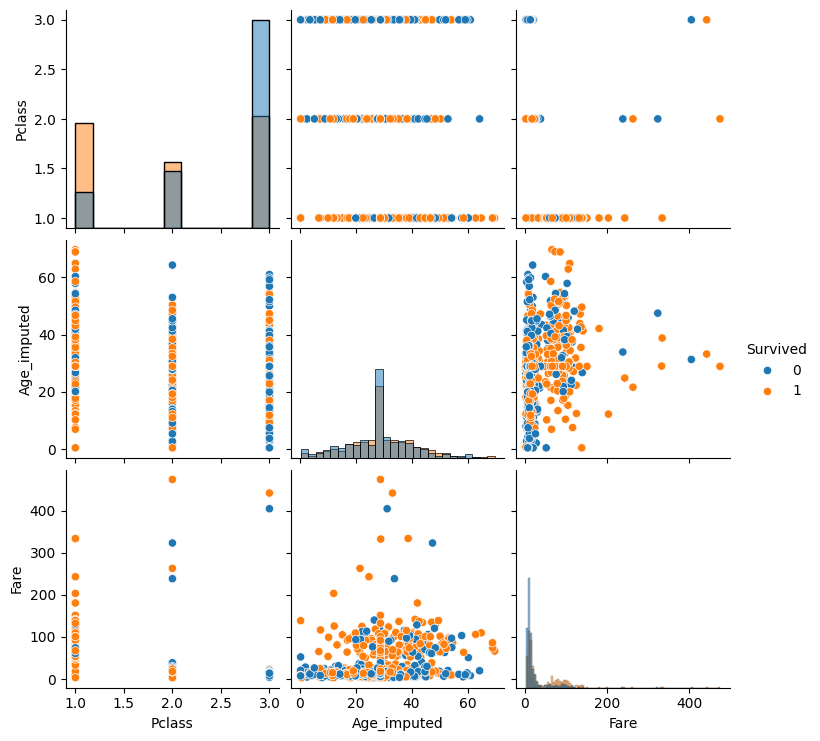

In [9]:
# Pairplot on a subset to visualize relationships
sns.pairplot(df[['Survived','Pclass','Age_imputed','Fare']], hue='Survived', diag_kind='hist')
plt.show()

## Observations
- **Sex vs Survival:** Females show notably higher survival rates compared to males, which aligns with historical reports.
- **Class vs Survival:** Passengers in higher classes (1 > 2 > 3) tend to have higher survival rates.
- **Fare:** Higher fare (proxy for class/amenities) is mildly associated with higher survival.
- **Age:** The effect of age is subtle; extreme ages can show different patterns. We imputed missing ages with the median to enable plots.
- **Family (SibSp/Parch):** Small family sizes sometimes correlate with slightly better outcomes than very large groups.
- **Outliers:** Fare shows some outliers, which is expected (a few premium tickets/cabins).